# Enigme 2 : La porte du trésor

Il y a 4 joueurs, avec 2 couleurs de cheveux différentes possibles : orange et bleu.

Défi : Trouver une stratégie avec les autres joueurs pour déterminer la couleur de toutes les chevelures.

## Etape 1 : importation des modules de base

In [29]:
import numpy as np
from qiskit import *
from qiskit.visualization import *

## Etape 2 :
Création du circuit quantique avec huit Qubits :
les Qubits de "q0" à "q3" représentent les quatre joueurs
les Qubits de "q4" à "q7" représentent les raisonnements quatre joueurs

In [30]:
circ = QuantumCircuit(8)

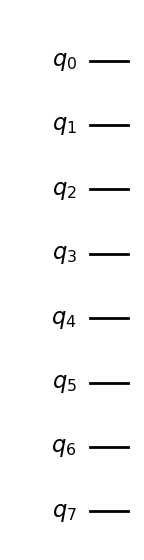

In [31]:
circ.draw("mpl")

## Etape 3 :
Création de portes Hadamard sur les Qubits représentant les quatre joueurs ("q0" à "q3") afin d'explorer tous les cas possibles de l'énigme en parallèle

In [32]:
circ.h(0)
circ.h(1)
circ.h(2)
circ.h(3)

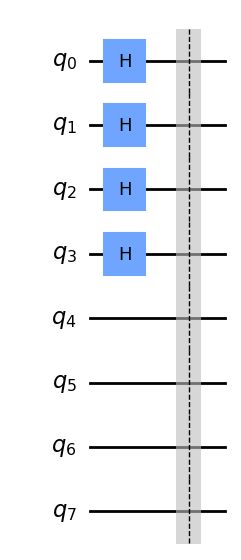

In [33]:
circ.barrier([0, 1, 2, 3, 4, 5, 6, 7])
circ.draw("mpl")

On ajoute 3 portes C-not pour représenter les couleurs des 3 chevelures et calculer s'il y a un nombre pair ou impair de chevelures Indigo

In [34]:
circ.cx(1, 4)
circ.cx(2, 4)
circ.cx(3, 4)

In [35]:
circ.draw("mpl")
circ.barrier([0, 1, 2, 3, 4, 5, 6, 7])

Ici, la réponse est consignée dans l'état du Qbit 4

In [36]:
circ.cx(4, 5)
circ.cx(4, 6)
circ.cx(4, 7)

In [37]:
circ.draw("mpl")
circ.barrier([0, 1, 2, 3, 4, 5, 6, 7])

Le deuxième joueur voit les couleurs des chevelures devant lui et s'en sert pour déterminer la couleur de sa propre chevelure.

In [38]:
circ.cx(2, 5)
circ.cx(3, 5)

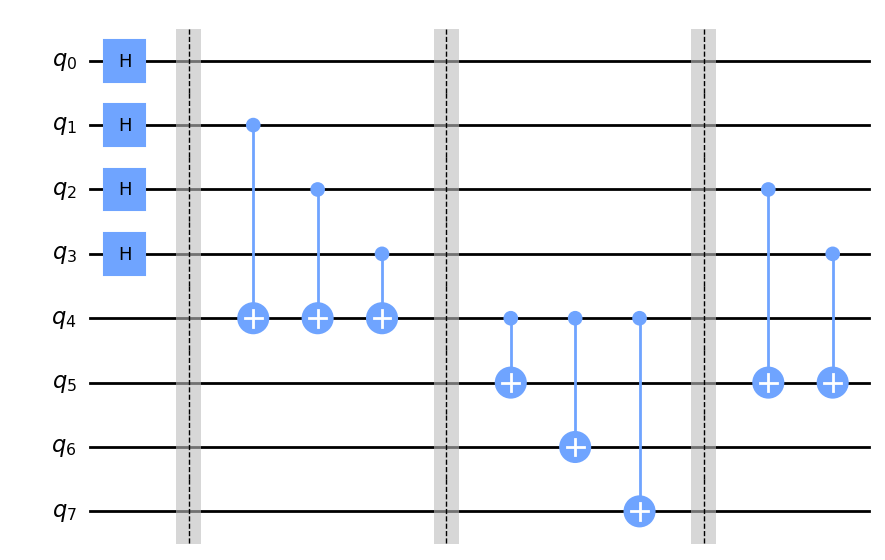

In [39]:
circ.draw("mpl")

In [40]:
circ.barrier([0, 1, 2, 3, 4, 5, 6, 7])

In [41]:
circ.cx(5, 6)
circ.cx(5, 7)

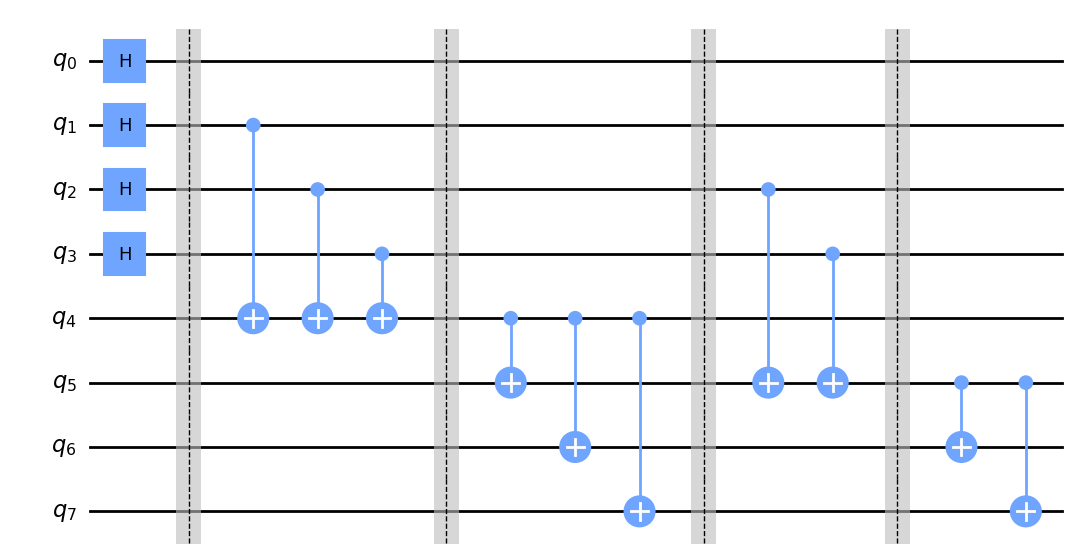

In [42]:
circ.draw("mpl")

In [43]:
circ.barrier([0, 1, 2, 3, 4, 5, 6, 7])

Le 3ème joueur note la couleur de la chevelure devant lui, et annonce la couleur de sa propre chevelure

In [44]:
circ.cx(3, 6)

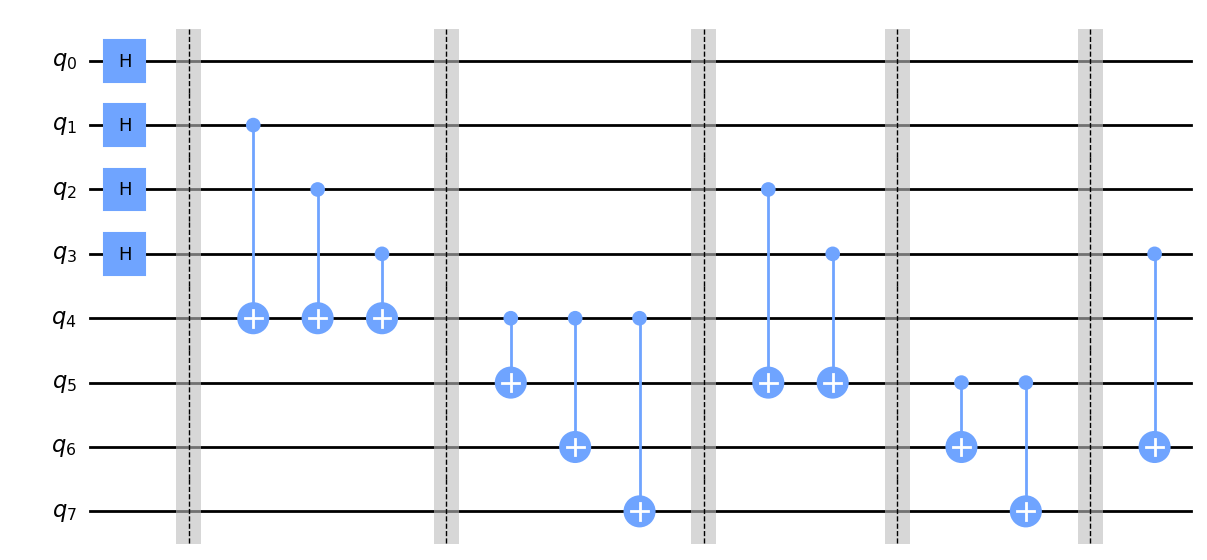

In [45]:
circ.draw("mpl")

In [46]:
circ.barrier([0, 1, 2, 3, 4, 5, 6, 7])

Le dernier joueur note finalement cette réponse et annonce la couleur de sa propre chevelure

In [47]:
circ.cx(6, 7)

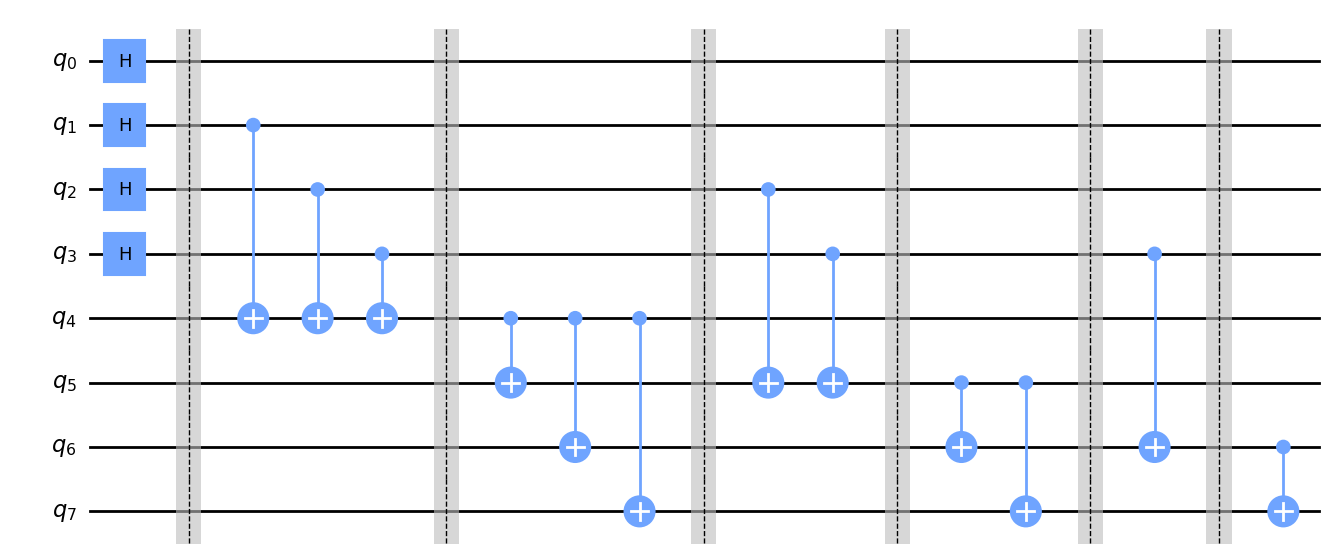

In [48]:
circ.draw("mpl")

In [49]:
circ.measure_all()

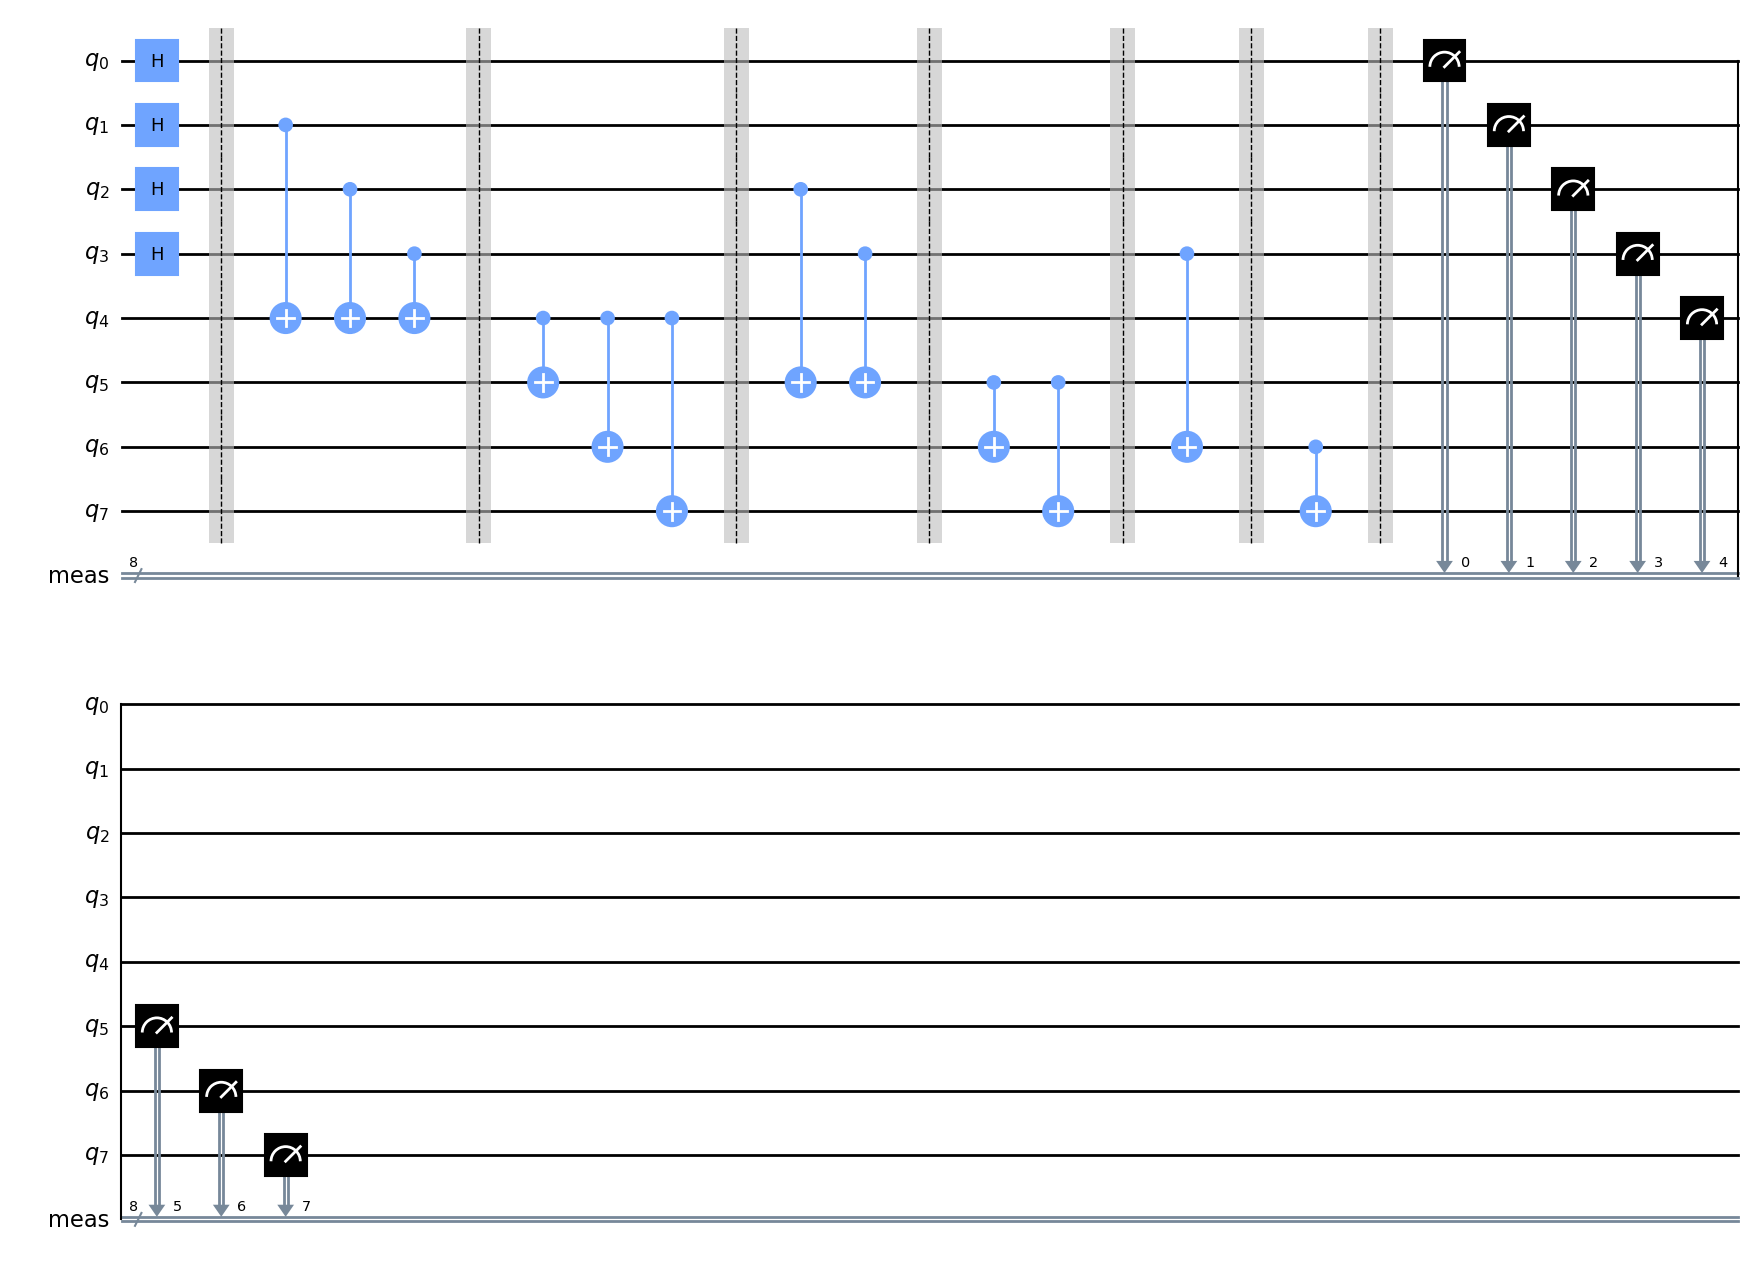

In [50]:
circ.draw("mpl")

# Etape 4 : Simulation

In [51]:
backend = Aer.get_backend('statevector_simulator')
simulator = backend.run(circ)
result = simulator.result()

In [53]:
counts = result.get_counts()
print(counts)

{'01100110': 1}


Il y existent 16 combinaisons possibles des couleurs de chevelure.